# Test field

## Text parsing

Bitcoin hits bigger stage as exchange giant CME launches futures
Gertrude Chavez-Dreyfuss, Swati Pandey

4 Min Read

NEW YORK/SYDNEY (Reuters) - Bitcoin futures received a lukewarm reception at its launch on the CME Group Inc on Sunday, although market experts believe a recent rally in the cryptocurrency has further to go.
FILE PHOTO: A copy of bitcoin standing on PC motherboard is seen in this illustration picture, October 26, 2017. REUTERS/Dado Ruvic/File Photo

The CME bitcoin front-month futures contract did open higher at $20,650, but dropped 6 percent within the first half hour.

Sponsored

The contract was last at $18,805, below the $19,500 reference price set by the exchange for the January contract.

The reference price, from which price limits are set, is $19,600 for the February contract, $19,700 for March and $19,900 for June, according to CME.

On Dec. 10, Chicago-based derivatives exchange Cboe Global Markets launched bitcoin futures, which saw the price surge nearly 20 percent in its debut.

The week-old bitcoin futures contract at the Cboe was last trading at $18,890, up 4.3 percent.

Spot bitcoin eased 1.9 percent on the Bitstamp exchange to $18,650, after surging to a record high of $19,666 on Sunday.

The launch of bitcoin futures is viewed as a major step in the digital currency’s path toward legitimacy, which should encourage the entry of big institutional investors.

“We saw a nice open on light volume, but pretty uneventful so far,” Spencer Bogart, partner at Blockchain Capital LLC, said shortly after trading began on Sunday.

“This is a brand-new asset class and I think perhaps a lot of investors want to sit back and see how this plays out before dipping their toes in this market.”
FILE PHOTO: A man enters the CME Group offices in New York, U.S., October 18, 2017. REUTERS/Brendan McDermid/File Photo

Volume on CME was recently at 590 contracts. On its debut on Dec. 10, the Cboe traded nearly 4,000 contracts during the full session.

Bitcoin was set up in 2008 by an individual or group calling itself Satoshi Nakamoto, and was the first digital currency to successfully use cryptography to keep transactions secure and hidden, making traditional financial regulation difficult if not impossible.
HIGHER MARGINS

Some investors believe the CME bitcoin futures could attract more institutional demand because the final settlement price is culled from multiple exchanges.
Slideshow (2 Images)

“The launch should increase buy side pressure and potentially be the catalyst that pushes bitcoin above $20,000,” said Shane Chanel, a fund manager at ASR Wealth Advisers in Melbourne.

“The introduction by CME and CBOE has added validity acknowledging bitcoin as a legitimate asset.”

The Cboe futures contract is based on a closing auction price of bitcoin from the Gemini exchange, which is owned and operated by virtual currency entrepreneurs Cameron and Tyler Winklevoss.

The general sentiment in the market remains one of caution and that has been reflected in margin requirements for the contracts.

In the futures market, margin refers to the initial deposit made into an account in order to enter into a contract.

The margin requirement at CME is 35 percent, while at Cboe, it is 40 percent, reflecting bitcoin’s volatility. The margin for an S&P 500 futures contract, by contrast, is just 5 percent, analysts said.

One futures trader said the average margin for brokers or intermediaries on bitcoin contracts was roughly twice the exchange margins.

Reporting by Gertrude Chavez-Dreyfuss, Rodrigo Campos in NEW YORK and Swati Pandey in SYDNEY; Editing by Jennifer Ablan and Peter Cooney

In [46]:
import nltk
import numpy as np
import re
from nltk.tokenize import RegexpTokenizer
import collections

In [76]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()
    
raw = re.sub(r'\d+', '', raw)
tokens = nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(raw)
postags = nltk.pos_tag(tokens)
#print(postags)
text= nltk.Text(tokens)
words = [w.lower() for w in text]
wnl = nltk.WordNetLemmatizer()
words = [words[k] for k in np.arange(len(words)) if ("ADJ" in postags[k][1]) or ("NN" in postags[k][1])]
#words= [wnl.lemmatize(w) for w in words]
print(len(words)) # COOL!

247


In [77]:
wordList=np.unique(words)

wordList_filtered = np.array([word for word in wordList if word not in set(nltk.corpus.stopwords.words('english'))])
#wordList_filtered = np.array([word for word in wordList_filtered if word not in set(nltk.corpus.stopwords.words('english'))])
print(wordList_filtered) 


['ablan' 'account' 'advisers' 'analysts' 'asr' 'asset' 'auction' 'bitcoin'
 'bitstamp' 'blockchain' 'bogart' 'brand' 'brendan' 'brokers' 'cameron'
 'campos' 'capital' 'catalyst' 'caution' 'cboe' 'chanel' 'chavez' 'chicago'
 'class' 'closing' 'cme' 'contract' 'contracts' 'contrast' 'cooney' 'copy'
 'cryptocurrency' 'cryptography' 'currency' 'dado' 'debut' 'dec' 'demand'
 'deposit' 'derivatives' 'dreyfuss' 'editing' 'entrepreneurs' 'entry'
 'exchange' 'exchanges' 'experts' 'february' 'file' 'fund' 'futures'
 'gemini' 'gertrude' 'giant' 'global' 'group' 'half' 'high' 'higher' 'hour'
 'illustration' 'inc' 'individual' 'intermediaries' 'introduction'
 'investors' 'january' 'jennifer' 'june' 'launch' 'legitimacy' 'limits'
 'llc' 'lot' 'man' 'manager' 'march' 'margin' 'margins' 'market' 'markets'
 'mcdermid' 'melbourne' 'min' 'month' 'motherboard' 'nakamoto' 'new'
 'october' 'offices' 'order' 'p' 'pandey' 'partner' 'path' 'pc' 'percent'
 'peter' 'photo' 'picture' 'pressure' 'price' 'rally' 'r

In [78]:
#Ok, set a window and go and build the graph
import networkx as nx
import scipy.sparse as sps    
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [79]:
w = 2

Adj_mat = sps.lil_matrix((len(wordList_filtered),len(wordList_filtered)),dtype="float64")

for i in np.arange(len(words)):
    src=np.where(wordList_filtered==wnl.lemmatize(words[i]))
    if(len(src)>0):
        for j in np.arange(i+1,np.min([i+w,len(words)])):
            dest=np.where(wordList_filtered==wnl.lemmatize(words[j]))
            if(len(dest)>0):
                if(not src == dest):
                    try:
                        Adj_mat[src,dest]=Adj_mat[src,dest]+1
                        Adj_mat[dest,src]=Adj_mat[dest,src]+1#undirected graph
                    except:
                        Adj_mat[src,dest]=1
                        Adj_mat[dest,src]=1
                    #print(src,dest)
        
Adj_mat = sps.csr_matrix(Adj_mat)


In [80]:
print(Adj_mat.nnz)

336


In [81]:
gow = nx.Graph(Adj_mat)

READY


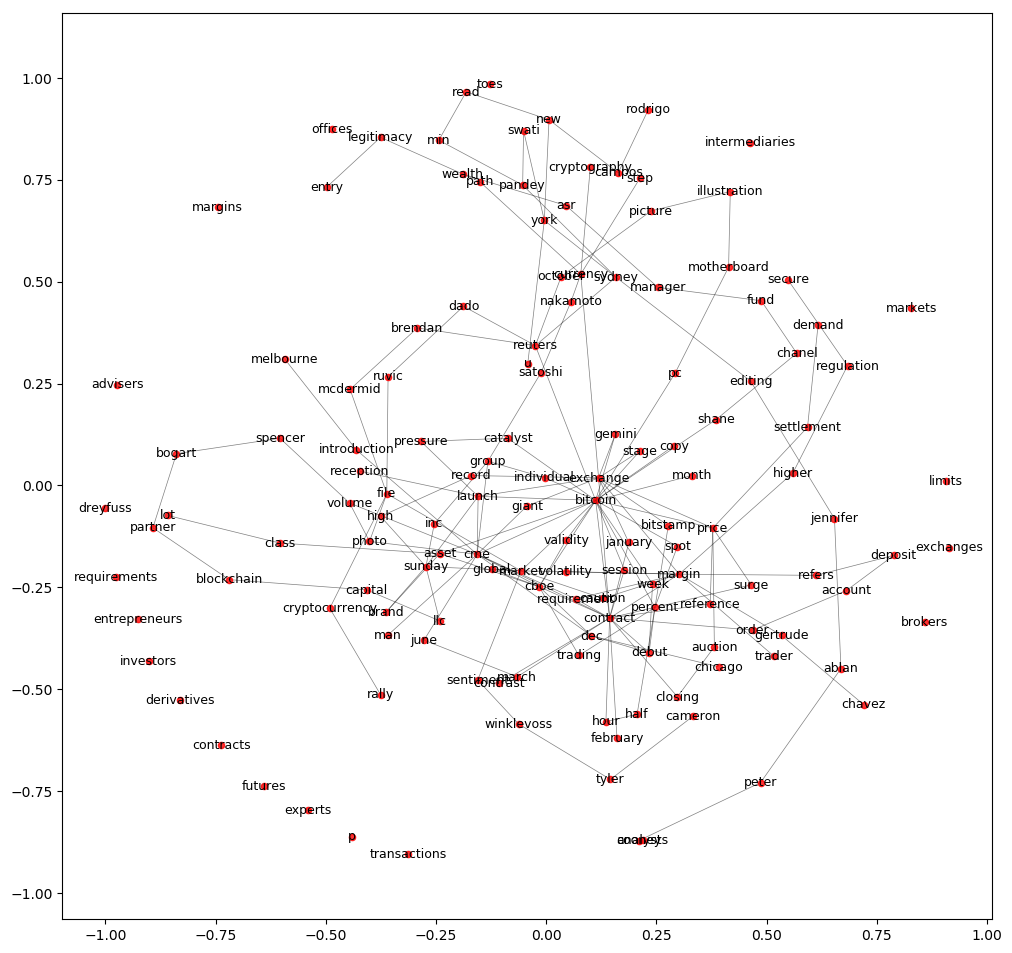

In [82]:
N=Adj_mat.shape[0]#number of nodes

f, ax = plt.subplots(figsize=(12,12))

pos=nx.spring_layout(gow, k= 1/np.sqrt(N)*35,iterations=710,weight=0.1) # positions for all nodes

nx.draw_networkx_nodes(gow,pos,
                       node_list=np.arange(len(wordList_filtered)),
                       node_color='r',
                       node_size=20,
                   alpha=0.8)


# edges
nx.draw_networkx_edges(gow,pos,width=0.5,arrows=False,alpha=0.5)



# some math labels
nx.draw_networkx_labels(gow,pos,dict(zip(np.arange(len(wordList_filtered)),wordList_filtered)),font_size=9)
print("READY")#to suppress output

#nx.draw_spring(gow,node_list=wordList_filtered)

In [83]:
#COOL
# now find communities and display it
# Girvan-Newman, first
import itertools
import networkx.algorithms.community as nxcom

In [84]:
k = 10#FIXED #best modularity?
comp = nxcom.centrality.girvan_newman(gow)

for communities in itertools.islice(comp, k):
    communities = list(sorted(c) for c in communities)   

READY


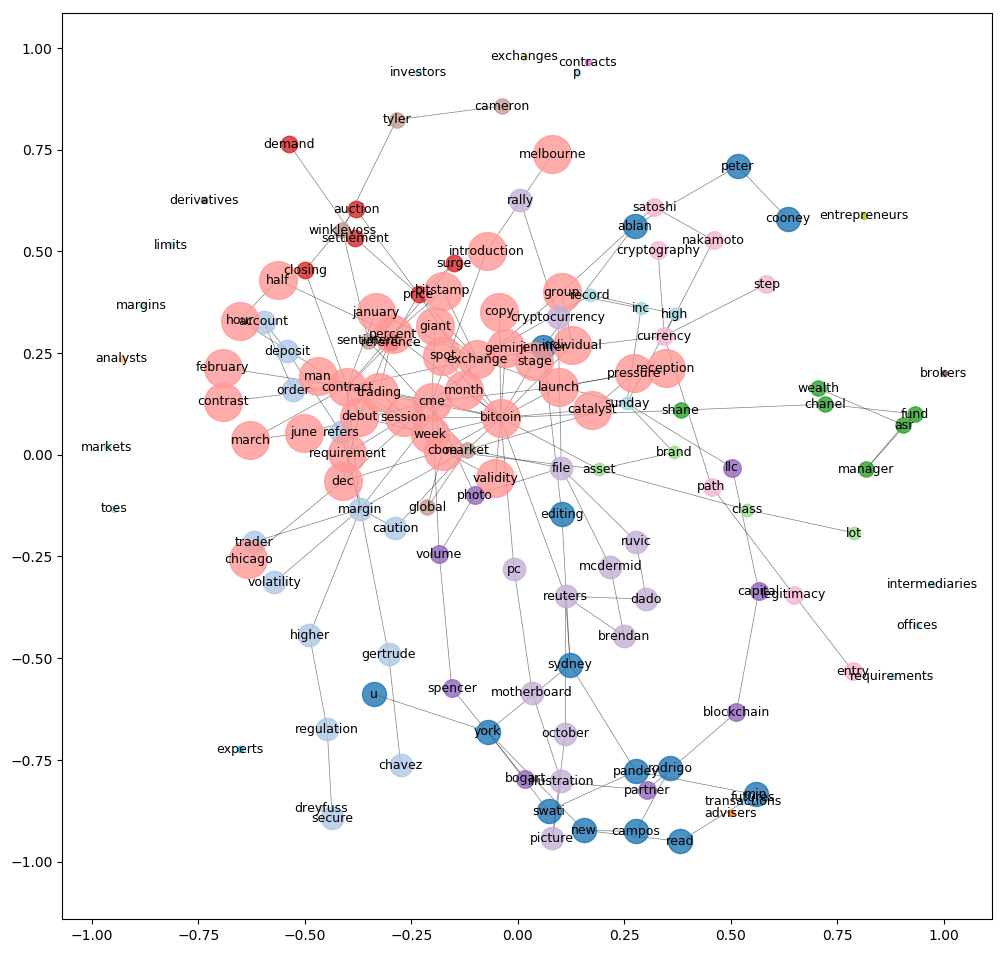

In [85]:
#NOW DRAW IT!
f, ax = plt.subplots(figsize=(12,12))

pos=nx.spring_layout(gow, k= 1/np.sqrt(N)*35,iterations=710,weight=0.1) # positions for all nodes

cmap_tab10 = plt.get_cmap("tab20")


for com_id in np.arange(len(communities)):
    #print(matplotlib.colors.to_hex(cmap_tab10(com_id)))
    nx.draw_networkx_nodes(gow,pos,
                           nodelist=communities[com_id],
                           node_color=""+matplotlib.colors.to_hex(cmap_tab10(com_id)),
                           node_size=20*len(communities[com_id]),
                       alpha=0.8)


# edges
nx.draw_networkx_edges(gow,pos,width=0.5,arrows=False,alpha=0.5)



# some math labels
nx.draw_networkx_labels(gow,pos,dict(zip(np.arange(len(wordList_filtered)),wordList_filtered)),font_size=9)
print("READY")
#to suppress output

#nx.draw_spring(gow,node_list=wordList_filtered)

In [86]:
#k-clique communities
k = 10#FIXED
compKclique = nxcom.kclique.k_clique_communities(gow,k)

for communities in itertools.islice(compKclique, k):
    communities = list(sorted(c) for c in communities)


{0: 'ablan', 1: 'account', 2: 'advisers', 3: 'analysts', 4: 'asr', 5: 'asset', 6: 'auction', 7: 'bitcoin', 8: 'bitstamp', 9: 'blockchain', 10: 'bogart', 11: 'brand', 12: 'brendan', 13: 'brokers', 14: 'cameron', 15: 'campos', 16: 'capital', 17: 'catalyst', 18: 'caution', 19: 'cboe', 20: 'chanel', 21: 'chavez', 22: 'chicago', 23: 'class', 24: 'closing', 25: 'cme', 26: 'contract', 27: 'contracts', 28: 'contrast', 29: 'cooney', 30: 'copy', 31: 'cryptocurrency', 32: 'cryptography', 33: 'currency', 34: 'dado', 35: 'debut', 36: 'dec', 37: 'demand', 38: 'deposit', 39: 'derivatives', 40: 'dreyfuss', 41: 'editing', 42: 'entrepreneurs', 43: 'entry', 44: 'exchange', 45: 'exchanges', 46: 'experts', 47: 'february', 48: 'file', 49: 'fund', 50: 'futures', 51: 'gemini', 52: 'gertrude', 53: 'giant', 54: 'global', 55: 'group', 56: 'half', 57: 'high', 58: 'higher', 59: 'hour', 60: 'illustration', 61: 'inc', 62: 'individual', 63: 'intermediaries', 64: 'introduction', 65: 'investors', 66: 'january', 67: 'je

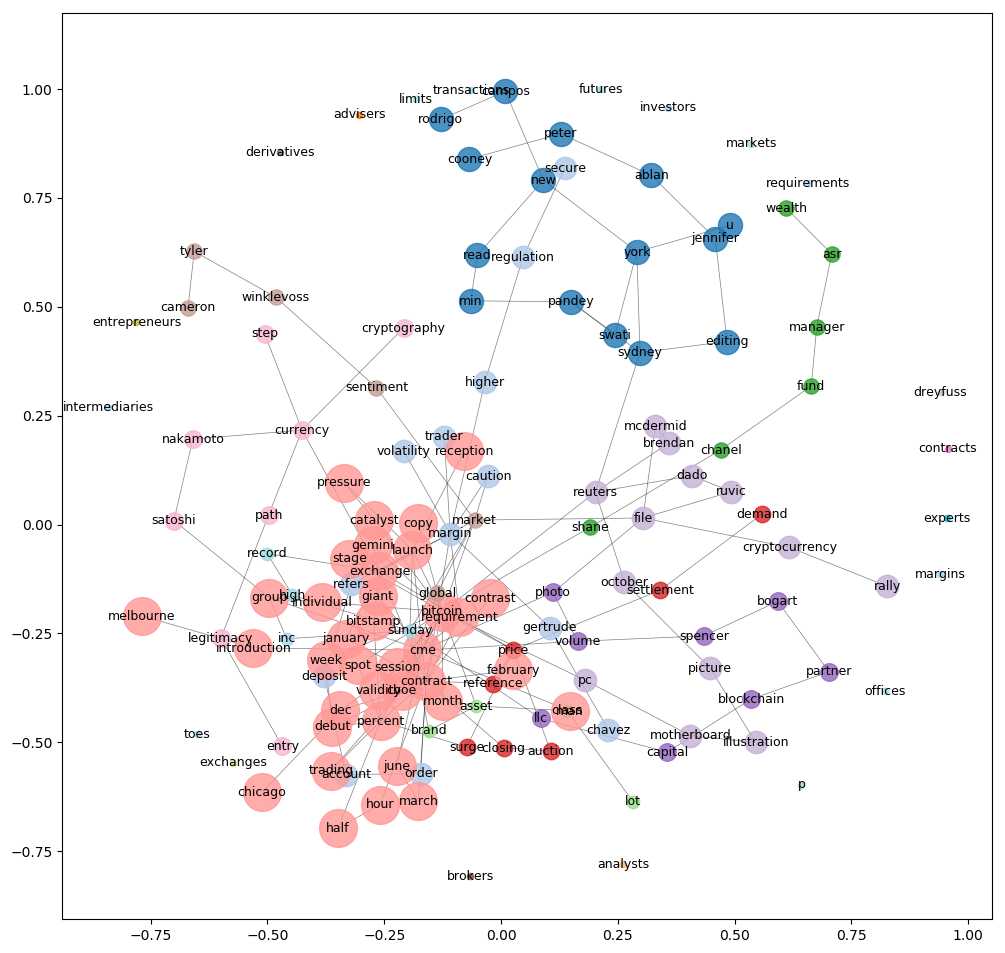

In [87]:
#NOW DRAW IT!
f, ax = plt.subplots(figsize=(12,12))

pos=nx.spring_layout(gow, k= 1/np.sqrt(N)*35,iterations=710,weight=0.1) # positions for all nodes

cmap_tab10 = plt.get_cmap("tab20")


for com_id in np.arange(len(communities)):
    #print(matplotlib.colors.to_hex(cmap_tab10(com_id)))
    nx.draw_networkx_nodes(gow,pos,
                           nodelist=communities[com_id],
                           node_color=""+matplotlib.colors.to_hex(cmap_tab10(com_id)),
                           node_size=20*len(communities[com_id]),
                       alpha=0.8)


# edges
nx.draw_networkx_edges(gow,pos,width=0.5,arrows=False,alpha=0.5)



# some math labels
print(dict(zip(np.arange(len(wordList_filtered)),wordList_filtered)))
nx.draw_networkx_labels(gow,pos,dict(zip(np.arange(len(wordList_filtered)),wordList_filtered)),font_size=9)
print("READY")
#to suppress output

#nx.draw_spring(gow,node_list=wordList_filtered)

In [88]:
kcore=nx.algorithms.core.k_core(gow)
print(kcore.nodes)

[96, 35, 19, 36, 69, 7, 25, 26, 44, 77, 109]


READY


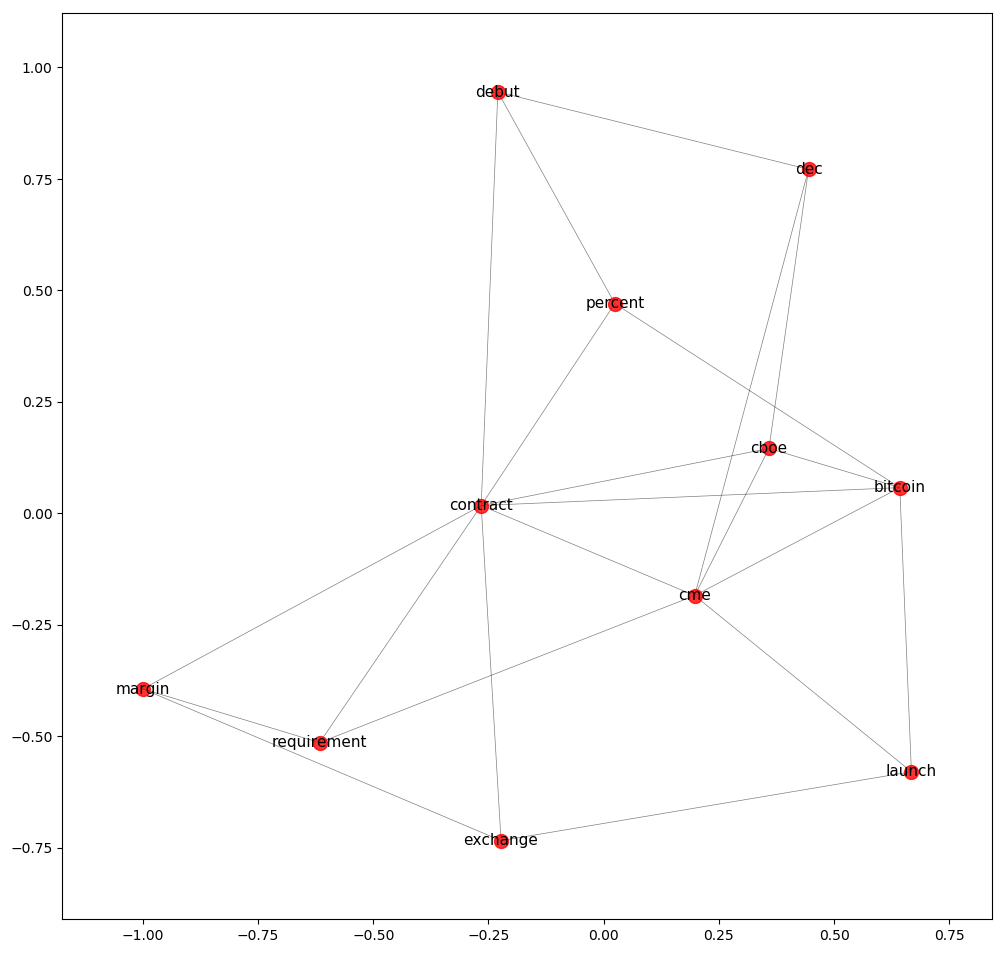

In [89]:
#NOW DRAW IT!
f, ax = plt.subplots(figsize=(12,12))

pos=nx.spring_layout(kcore, k= 1/np.sqrt(len(kcore.nodes))*35,iterations=710,weight=0.1) # positions for all nodes

cmap_tab10 = plt.get_cmap("tab20")

    #print(matplotlib.colors.to_hex(cmap_tab10(com_id)))
nx.draw_networkx_nodes(kcore,pos,nodelist=kcore.nodes, node_size=100,
                       alpha=0.8)
# edges
nx.draw_networkx_edges(kcore,pos,width=0.5,arrows=False,alpha=0.5)

# some math labels
labs=dict(zip(kcore.nodes,list(wordList_filtered[kcore.nodes])))

nx.draw_networkx_labels(kcore,pos,labels=labs,font_size=11)
print("READY")
#to suppress output

#nx.draw_spring(gow,node_list=wordList_filtered)

In [90]:
#apply girvan-Newman
k = 10#FIXED #best modularity?
comp = nxcom.centrality.girvan_newman(kcore)

for communities in itertools.islice(comp, k):
    communities = list(sorted(c) for c in communities)   

READY


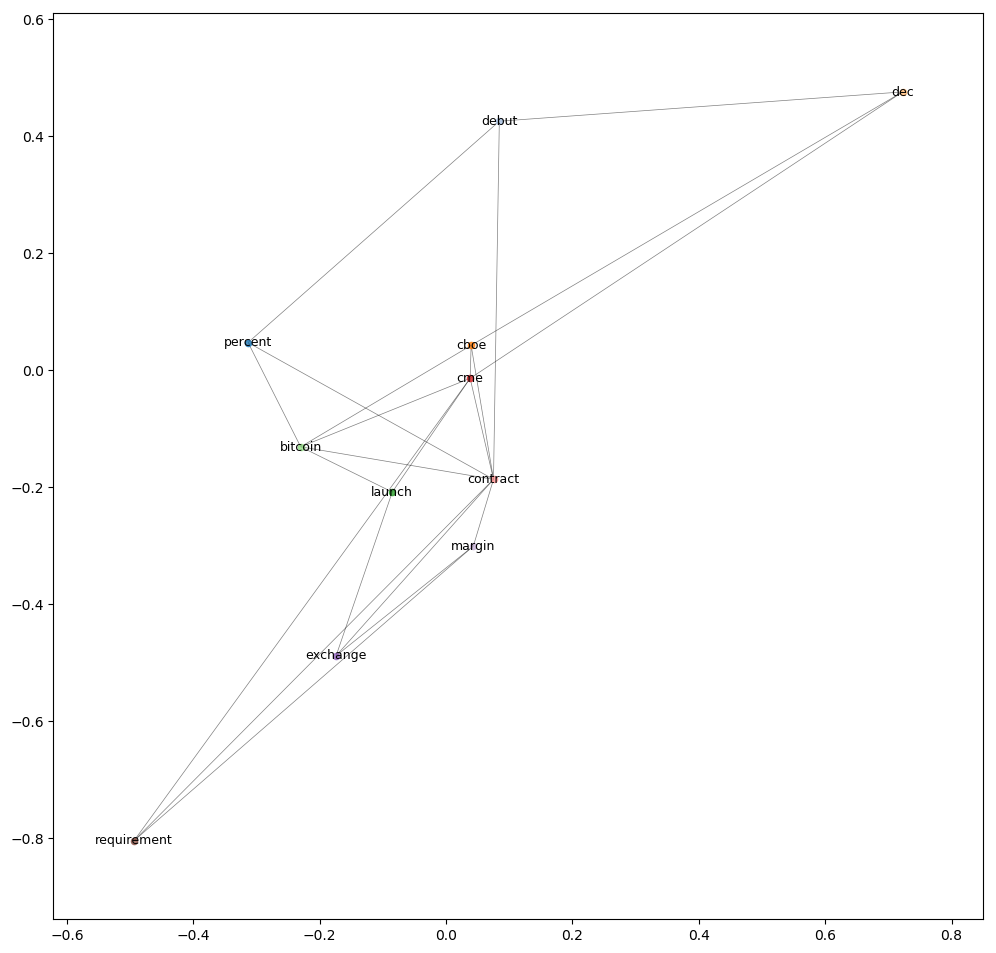

In [91]:
#NOW DRAW IT!
f, ax = plt.subplots(figsize=(12,12))

pos=nx.spring_layout(gow, k= 1/np.sqrt(len(kcore.nodes))*35,iterations=710,weight=0.1) # positions for all nodes

cmap_tab10 = plt.get_cmap("tab20")


for com_id in np.arange(len(communities)):
    #print(matplotlib.colors.to_hex(cmap_tab10(com_id)))
    nx.draw_networkx_nodes(gow,pos,
                           nodelist=communities[com_id],
                           node_color=""+matplotlib.colors.to_hex(cmap_tab10(com_id)),
                           node_size=20*len(communities[com_id]),
                       alpha=0.8)


# edges
nx.draw_networkx_edges(kcore,pos,width=0.5,arrows=False,alpha=0.5)

# some math labels
labs=dict(zip(kcore.nodes,list(wordList_filtered[kcore.nodes])))
nx.draw_networkx_labels(gow,pos,labs,font_size=9)
print("READY")
#to suppress output

#nx.draw_spring(gow,node_list=wordList_filtered)

READY


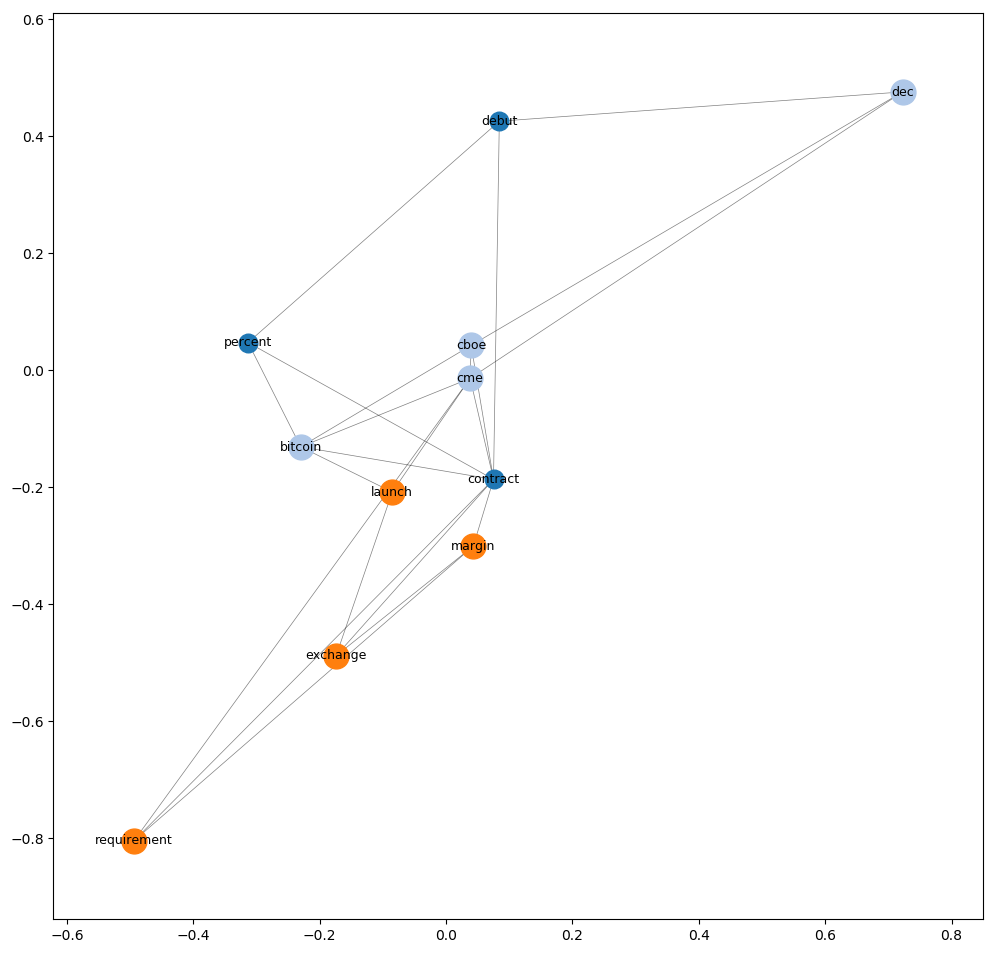

In [92]:
import community #python-louvain

communities = community.best_partition(kcore)

f, ax = plt.subplots(figsize=(12,12))


for com_id in set(communities.values()) :

    list_nodes = [nodes for nodes in communities.keys()
                    if communities[nodes] == com_id]
    nx.draw_networkx_nodes(kcore, pos, list_nodes, node_size = len(list_nodes)**2*20,
                                node_color = ""+matplotlib.colors.to_hex(cmap_tab10(com_id)))
    
nx.draw_networkx_edges(kcore,pos,width=0.5,arrows=False,alpha=0.5)
nx.draw_networkx_labels(gow,pos,labs,font_size=9)
print("READY")
    